In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
#import plotly.graph_objs as go
#import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# load data
df = pd.read_csv("heart.csv")

df.head()
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
y = df['target']
X = df.drop(['target'], axis = 1)

from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit(X_train).transform(X_train)
X_test=scaler.fit(X_test).transform(X_test)

In [5]:
from sklearn.decomposition import TruncatedSVD 
n = 1
truncatedSVD=TruncatedSVD(n)
truncatedSVD.fit(X_train)
explained_variance_sum = truncatedSVD.explained_variance_ratio_.sum()

while (explained_variance_sum < 0.90):
    n += 1
    truncatedSVD=TruncatedSVD(n)
    truncatedSVD.fit(X_train)
    explained_variance_sum = truncatedSVD.explained_variance_ratio_.sum()
print(f"The total variance ratio is : {explained_variance_sum}")
print(f"{n} components selected.")
print(f"Their variance ratios: ")
print(truncatedSVD.explained_variance_ratio_)

The total variance ratio is : 0.9002474853813502
8 components selected.
Their variance ratios: 
[0.08120071 0.2635914  0.15684837 0.12468277 0.08343752 0.08026811
 0.06071172 0.04950688]


In [6]:
svd =TruncatedSVD(8)
svd.fit(X_test)
X_test = svd.fit_transform(X_test)
X_train = svd.fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)

(768, 8)
(257, 8)


Text(0, 0.5, 'Accuracy Rate')

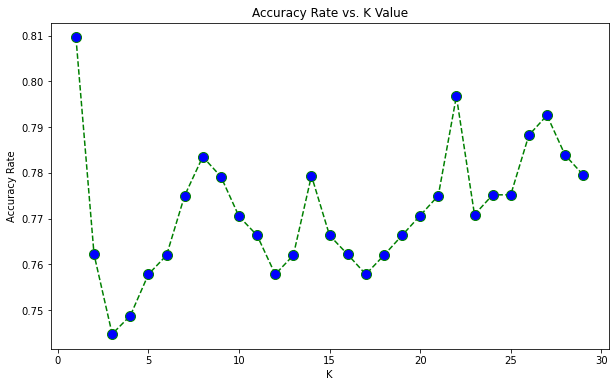

In [7]:
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
from matplotlib import style


X_train_knn, X_valid, y_train_knn, y_valid = train_test_split(X_train,y_train, train_size=0.7,random_state=42)
X_train_knn = scaler.fit_transform(X_train_knn)    


accuracy_rate = []

for i in range(1,30): 
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_valid,y_valid,cv=10)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [13]:
# Running KNN model
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, y_train)
y_pred_knn= classifier.predict(X_test) 
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       123
           1       0.70      0.74      0.72       134

    accuracy                           0.70       257
   macro avg       0.70      0.70      0.70       257
weighted avg       0.70      0.70      0.70       257



In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

gNB = GaussianNB()
gNB.fit(X_train,y_train)
y_pred_nb = gNB.predict(X_test)


print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       123
           1       0.72      0.83      0.77       134

    accuracy                           0.74       257
   macro avg       0.75      0.74      0.74       257
weighted avg       0.74      0.74      0.74       257



In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       123
           1       0.67      0.71      0.69       134

    accuracy                           0.67       257
   macro avg       0.66      0.66      0.66       257
weighted avg       0.67      0.67      0.66       257



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lr=logreg.predict(X_test)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       123
           1       0.70      0.79      0.74       134

    accuracy                           0.72       257
   macro avg       0.72      0.71      0.71       257
weighted avg       0.72      0.72      0.71       257



In [18]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       123
           1       0.68      0.75      0.72       134

    accuracy                           0.69       257
   macro avg       0.69      0.69      0.69       257
weighted avg       0.69      0.69      0.69       257



In [20]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

print(classification_report(y_test,y_pred_rf))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       123
           1       0.72      0.81      0.76       134

    accuracy                           0.74       257
   macro avg       0.74      0.73      0.73       257
weighted avg       0.74      0.74      0.73       257



In [21]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = build_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=2)


scores = model.evaluate(X_test, y_test)
print(f'Accuracy: {scores[1]} \n Error: {1 - scores[1]}')
print(classification_report(model.evaluate(X_test, y_test)))

Epoch 1/200
24/24 - 0s - loss: 0.5589 - accuracy: 0.7448 - val_loss: 0.6068 - val_accuracy: 0.7276
Epoch 2/200
24/24 - 0s - loss: 0.4003 - accuracy: 0.8151 - val_loss: 0.6994 - val_accuracy: 0.7121
Epoch 3/200
24/24 - 0s - loss: 0.3821 - accuracy: 0.8385 - val_loss: 0.6947 - val_accuracy: 0.7043
Epoch 4/200
24/24 - 0s - loss: 0.3427 - accuracy: 0.8607 - val_loss: 0.7764 - val_accuracy: 0.7160
Epoch 5/200
24/24 - 0s - loss: 0.3472 - accuracy: 0.8398 - val_loss: 0.7645 - val_accuracy: 0.7121
Epoch 6/200
24/24 - 0s - loss: 0.3117 - accuracy: 0.8620 - val_loss: 0.9170 - val_accuracy: 0.6576
Epoch 7/200
24/24 - 0s - loss: 0.2894 - accuracy: 0.8763 - val_loss: 0.9494 - val_accuracy: 0.6965
Epoch 8/200
24/24 - 0s - loss: 0.2767 - accuracy: 0.8750 - val_loss: 1.0128 - val_accuracy: 0.6654
Epoch 9/200
24/24 - 0s - loss: 0.2738 - accuracy: 0.8841 - val_loss: 1.0770 - val_accuracy: 0.6615
Epoch 10/200
24/24 - 0s - loss: 0.2506 - accuracy: 0.8841 - val_loss: 1.1126 - val_accuracy: 0.6887
Epoch 11/

Epoch 84/200
24/24 - 0s - loss: 0.0392 - accuracy: 0.9870 - val_loss: 5.3471 - val_accuracy: 0.7276
Epoch 85/200
24/24 - 0s - loss: 0.0313 - accuracy: 0.9857 - val_loss: 5.7400 - val_accuracy: 0.7004
Epoch 86/200
24/24 - 0s - loss: 0.0378 - accuracy: 0.9870 - val_loss: 6.1430 - val_accuracy: 0.7082
Epoch 87/200
24/24 - 0s - loss: 0.0422 - accuracy: 0.9831 - val_loss: 5.7399 - val_accuracy: 0.6887
Epoch 88/200
24/24 - 0s - loss: 0.0347 - accuracy: 0.9857 - val_loss: 6.1565 - val_accuracy: 0.7004
Epoch 89/200
24/24 - 0s - loss: 0.0332 - accuracy: 0.9857 - val_loss: 6.3629 - val_accuracy: 0.7043
Epoch 90/200
24/24 - 0s - loss: 0.0419 - accuracy: 0.9831 - val_loss: 6.2044 - val_accuracy: 0.6770
Epoch 91/200
24/24 - 0s - loss: 0.0485 - accuracy: 0.9818 - val_loss: 5.7478 - val_accuracy: 0.6848
Epoch 92/200
24/24 - 0s - loss: 0.0453 - accuracy: 0.9792 - val_loss: 6.0456 - val_accuracy: 0.6926
Epoch 93/200
24/24 - 0s - loss: 0.0616 - accuracy: 0.9779 - val_loss: 6.0043 - val_accuracy: 0.7276


Epoch 166/200
24/24 - 0s - loss: 0.0328 - accuracy: 0.9857 - val_loss: 5.5923 - val_accuracy: 0.6965
Epoch 167/200
24/24 - 0s - loss: 0.0370 - accuracy: 0.9857 - val_loss: 5.4722 - val_accuracy: 0.6887
Epoch 168/200
24/24 - 0s - loss: 0.0465 - accuracy: 0.9883 - val_loss: 5.3246 - val_accuracy: 0.6848
Epoch 169/200
24/24 - 0s - loss: 0.0403 - accuracy: 0.9844 - val_loss: 5.6411 - val_accuracy: 0.6965
Epoch 170/200
24/24 - 0s - loss: 0.0197 - accuracy: 0.9935 - val_loss: 5.8138 - val_accuracy: 0.7004
Epoch 171/200
24/24 - 0s - loss: 0.0141 - accuracy: 0.9948 - val_loss: 6.2066 - val_accuracy: 0.7043
Epoch 172/200
24/24 - 0s - loss: 0.0143 - accuracy: 0.9961 - val_loss: 6.2992 - val_accuracy: 0.6887
Epoch 173/200
24/24 - 0s - loss: 0.0128 - accuracy: 0.9961 - val_loss: 6.4756 - val_accuracy: 0.7043
Epoch 174/200
24/24 - 0s - loss: 0.0124 - accuracy: 0.9948 - val_loss: 6.4831 - val_accuracy: 0.6887
Epoch 175/200
24/24 - 0s - loss: 0.0137 - accuracy: 0.9961 - val_loss: 6.7675 - val_accurac

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets